In [1]:
options(jupyter.plot_mimetypes = 'image/png')
options(repr.plot.width=5.0, repr.plot.height=4.0, repr.plot.res=300)

In [2]:
library(ggplot2)
library(ggthemes)
library(scales)

In [3]:
precomputed_densities = read.csv("../data/precomputed_kde_fig7a_20170508.csv")

In [4]:
# Relevel factors for ordering.
precomputed_densities$gender = factor(precomputed_densities$gender, levels = c("all", "male", "female"))
precomputed_densities$country = factor(precomputed_densities$country, levels = c("Japan", "United Kingdom", "United States", "Saudi Arabia"))

In [5]:
# For labelling facets

facet_names <- list(
  'Japan'="Japan (Inequality: 0.250)",
  'United Kingdom'="United Kingdom (Inequality: 0.288)",
  'United States'="United States (Inequality: 0.305)",
  'Saudi Arabia'="Saudi Arabia (Inequality: 0.321)"
)

facet_labeller <- function(variable,value){
  return(facet_names[value])
}

scientific_10 <- function(x) {
    if(x == 0) {
      return(expression(0))
    }
  parse(text=gsub("e", " %*% 10^", scientific_format()(x)))
}

Warning message:
“The labeller API has been updated. Labellers taking `variable`and `value` arguments are now deprecated. See labellers documentation.”Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.
Warning message:
“Removed 2646 rows containing missing values (position_stack).”

Warning message:
“Removed 2646 rows containing missing values (position_stack).”

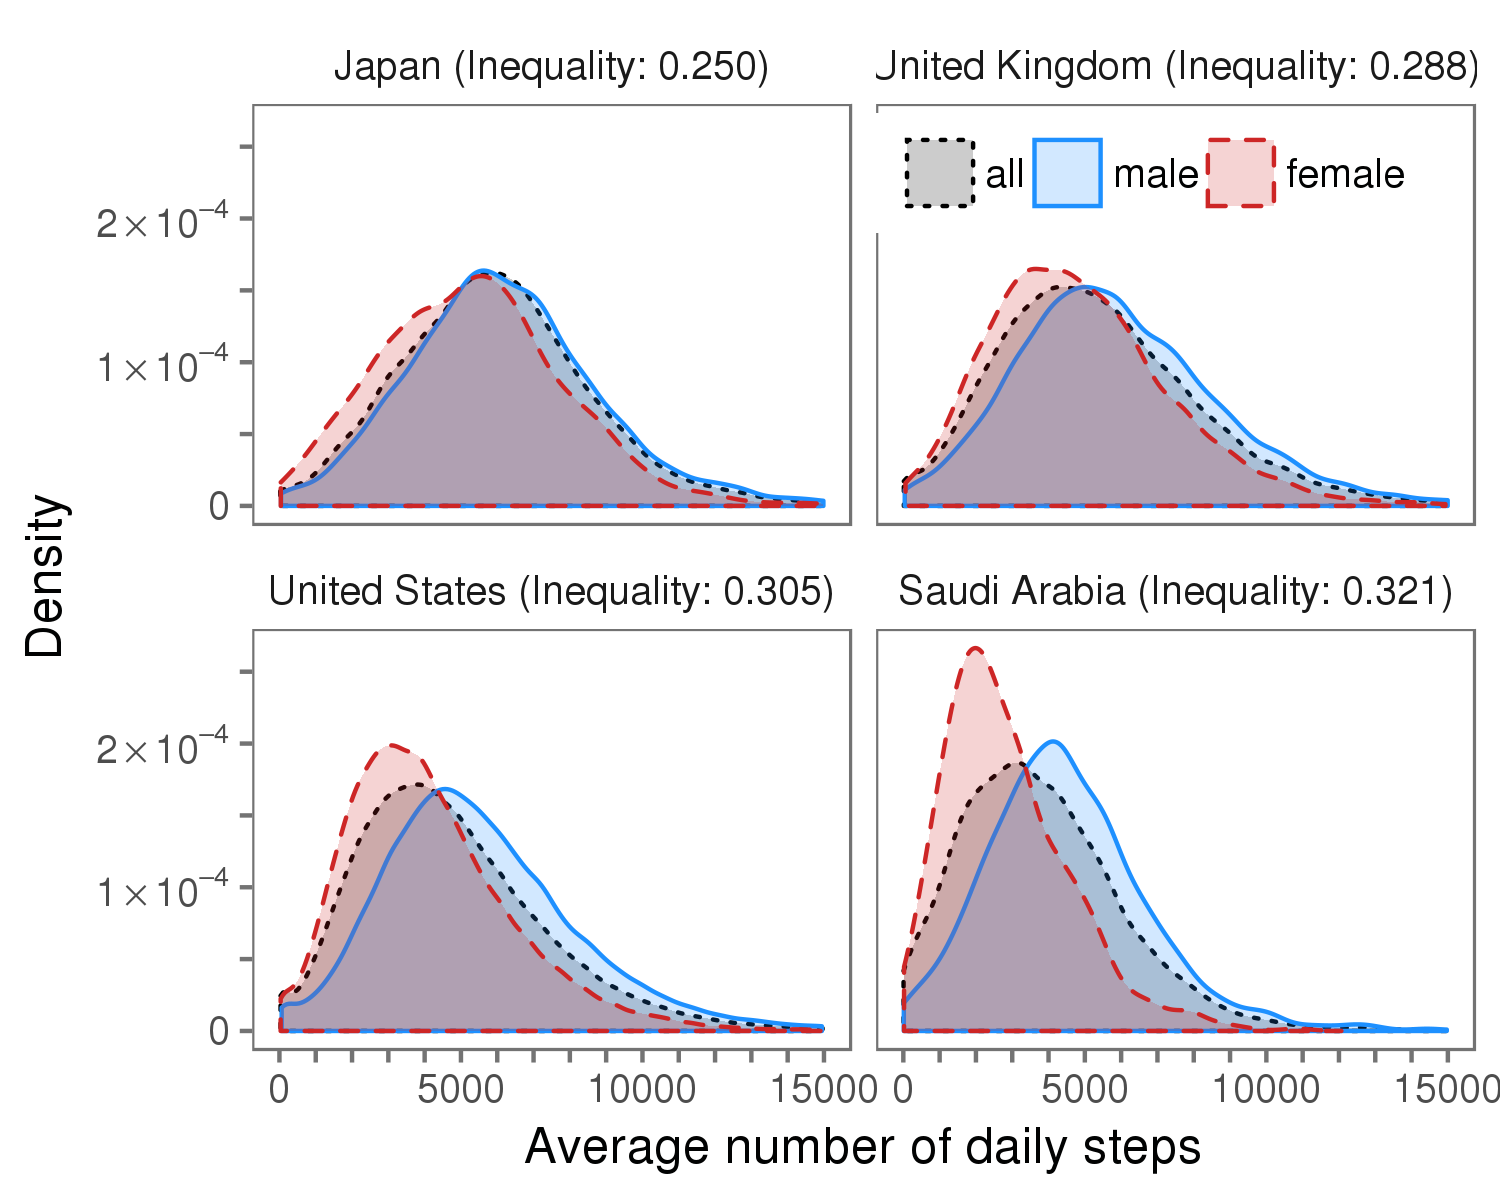

In [6]:
p = ggplot()
# p = ggplot(data=data_to_use, aes(x=n_steps, linetype=gender, color=gender, fill=gender)) # for non-precomputed data
# p = p + geom_density(fill=NA) # for non-precomputed data
# p = p + geom_density(alpha=.2) # for non-precomputed data
p = p + geom_area(data=precomputed_densities, aes(x, y, linetype=gender, color=gender, fill=gender), alpha=.2) # new for precomputed
p = p + facet_wrap(~country, nrow = 2, labeller=facet_labeller)
p = p + xlim(0,15000)
p <- p + labs(fill = "")
p <- p + labs(color = "")
p <- p + labs(linetype = "")
p <- p + xlab("Average number of daily steps") + ylab("Density") 
p <- p + scale_linetype_manual(values=c("dotted", "solid", "dashed"))
p <- p + scale_color_manual(values=c("black", "dodgerblue", "firebrick3"))
p <- p + scale_fill_manual(values=c("black", "dodgerblue", "firebrick3"))
p <- p + theme_few(base_size=12, base_family="Helvetica")
p <- p + theme(legend.justification=c(1,1), legend.position=c(.96,.99), legend.direction="horizontal")

# xticks
ticks = seq(0,15000,by=1000) 
labels = rep("", length(ticks))
labels[seq(1, length(labels), 5)] = sprintf("%d", ticks[seq(1, length(labels), 5)])
p <- p + scale_x_continuous(breaks=ticks, labels=labels, limits=c(0,15000))

# yticks
ticks = seq(0.0,3e-4,by=5e-5) 
labels = rep("", length(ticks))
labels[seq(1, length(labels), 2)] = sapply(ticks[seq(1, length(labels), 2)], scientific_10)
p <- p + scale_y_continuous(breaks=ticks, labels=labels)

p 

ggsave(filename="../output/edfig7a.pdf", plot=p, width=4, height=3)